<a href="https://colab.research.google.com/github/woojinhong03/My_study_in_2022_python/blob/main/spaceship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [278]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv("/content/drive/MyDrive/Kaggle Study/spaceship/train.csv")
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


* PassengerId - 각 승객의 고유 ID (gggg_pp - gggg:그룹, pp:그룹 내 번호) 
* HomePlanet - 승객이 출발한 행성 (일반적으로 거주하는 행성)
* Cryosleep - 극저온 수면 선택 여부
* Cabin - 객실 번호 (좌현 P, 우현 S)
* Destination - 승객이 내릴 행성
* Age - 승객의 나이
* VIP - 항해중 특별 서비스를 주문했는지 여부
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - 편의시설 청구 금액
* Name - 승객의 성과 이름
* Transported - 예측값, 승객이 다른 차원으로 운송되었는지 여부

In [280]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [281]:
data = data.dropna(axis=0)
data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [282]:
data = data.reset_index()
data.head(10)

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
8,9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
9,11,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True


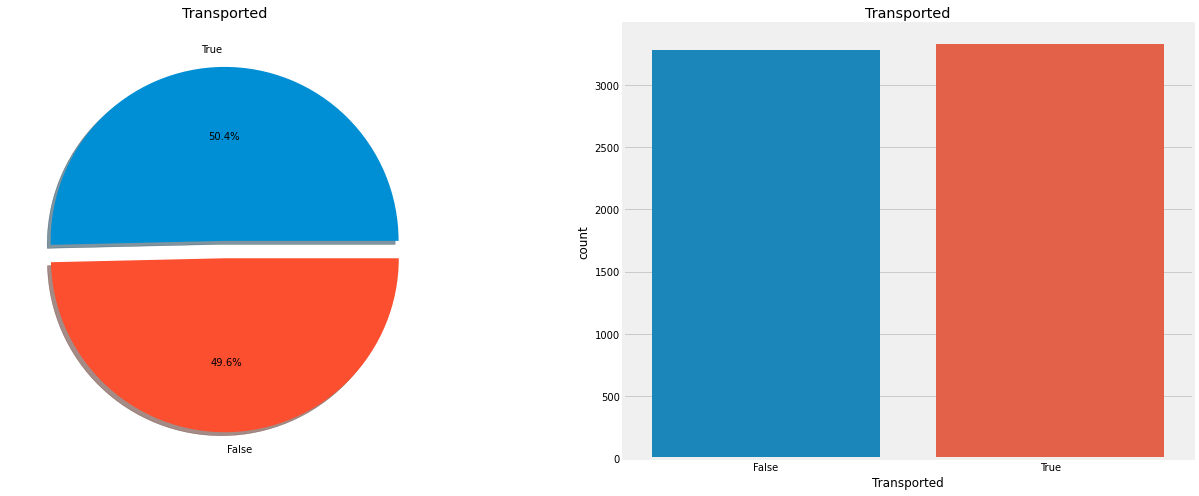

In [283]:
f,ax = plt.subplots(1,2,figsize=(20,8))
data['Transported'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Transported')
ax[0].set_ylabel('')
#print(ax[1])
sns.countplot('Transported',data=data,ax=ax[1])
ax[1].set_title('Transported')
plt.show()

In [284]:
data2 = pd.DataFrame(data.PassengerId.str.split('_',1).tolist(), columns = ['GroupId','NumId'])
data = pd.concat([data, data2], axis=1)
data = data.drop(["PassengerId"], axis=1)
data.head(10)

,index,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,NumId
0,0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01
5,5,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,0005,01
6,6,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,0006,01
7,8,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,0007,01
8,9,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0008,01
9,11,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True,0008,03


In [285]:
data["CryoSleep"].replace([False,True],[0,1],inplace=True)
data["CryoSleep"]

0       0
1       0
2       0
3       0
4       0
       ..
6601    0
6602    1
6603    0
6604    0
6605    0
Name: CryoSleep, Length: 6606, dtype: int64

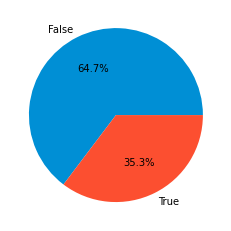

In [286]:
sleep_pi = [len(data[data['CryoSleep'] == 0]), len(data[data['CryoSleep'] == 1])]
sleep_pi_la = ['False','True']
plt.pie(sleep_pi, labels=sleep_pi_la, autopct='%.1f%%')
plt.show()

In [287]:
data["Transported"].replace([False,True],[0,1],inplace=True)
data["Transported"]

0       0
1       1
2       0
3       0
4       1
       ..
6601    0
6602    0
6603    1
6604    0
6605    1
Name: Transported, Length: 6606, dtype: int64

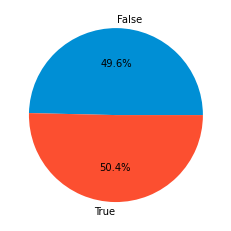

In [288]:
tp_pi = [len(data[data['Transported'] == 0]), len(data[data['Transported'] == 1])]
tp_pi_la = ['False','True']
plt.pie(tp_pi, labels=tp_pi_la, autopct='%.1f%%')
plt.show()

In [289]:
data["VIP"].replace([False,True],[0,1],inplace=True)
data["VIP"]

0       0
1       0
2       1
3       0
4       0
       ..
6601    1
6602    0
6603    0
6604    0
6605    0
Name: VIP, Length: 6606, dtype: int64

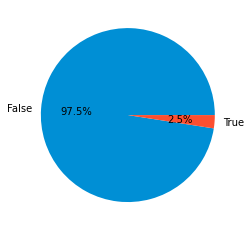

In [290]:
VIP_pi = [len(data[data['VIP'] == 0]), len(data[data['VIP'] == 1])]
VIP_pi_la = ['False','True']
plt.pie(VIP_pi, labels=VIP_pi_la, autopct='%.1f%%')
plt.show()

In [291]:
data.isnull().sum()

index           0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
GroupId         0
NumId           0
dtype: int64

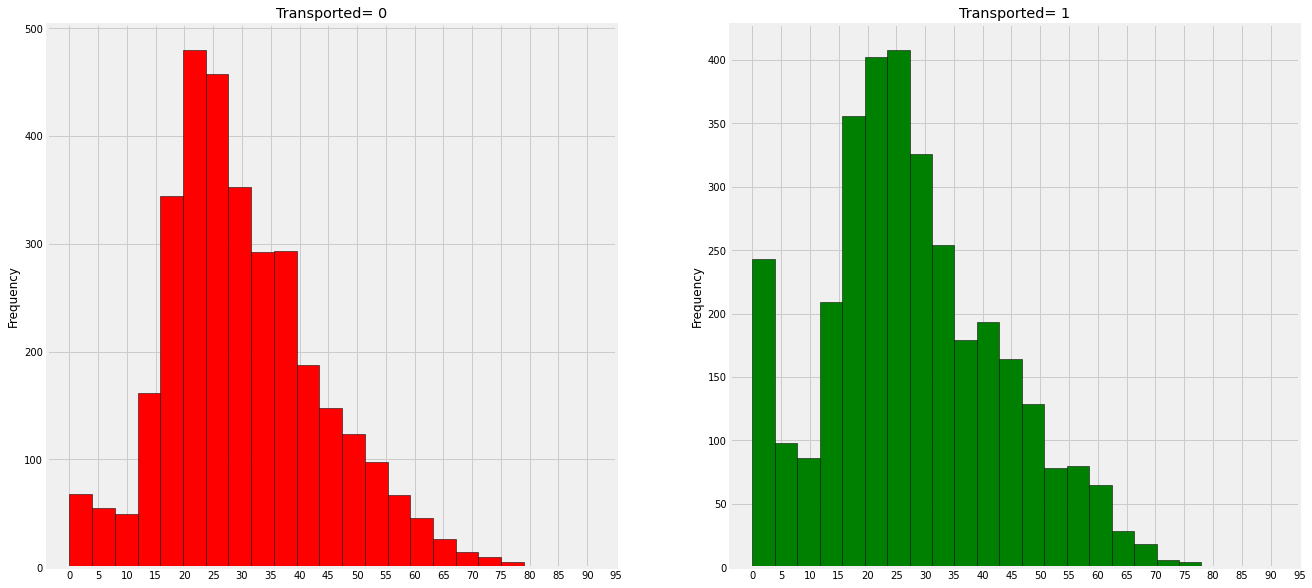

In [292]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Transported']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Transported= 0')
x1=list(range(0,100,5))
ax[0].set_xticks(x1)
data[data['Transported']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Transported= 1')
x2=list(range(0,100,5))
ax[1].set_xticks(x2)
plt.show()

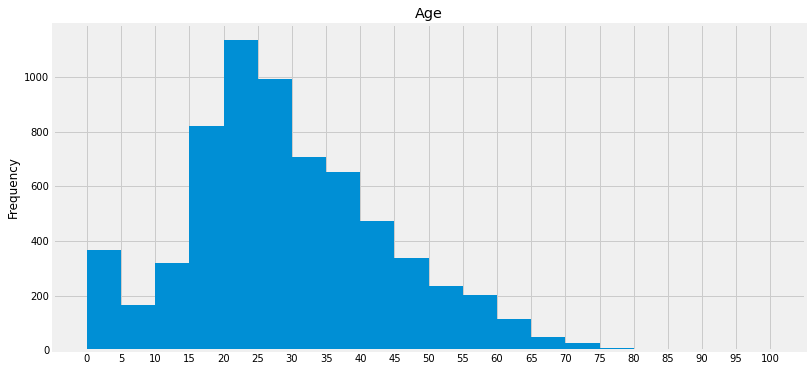

In [293]:
data["Age"].plot.hist(bins=range(0,101,5),figsize=[12,6])
plt.xticks(range(0,101,5))
plt.title("Age")
plt.show()

In [294]:
data['Age_band']=0
data.loc[data['Age']<=9,'Age_band']=0
data.loc[(data['Age']>9)&(data['Age']<=19),'Age_band']=1
data.loc[(data['Age']>19)&(data['Age']<=29),'Age_band']=2
data.loc[(data['Age']>29)&(data['Age']<=39),'Age_band']=3
data.loc[(data['Age']>39)&(data['Age']<=49),'Age_band']=4
data.loc[(data['Age']>49)&(data['Age']<=59),'Age_band']=5
data.loc[(data['Age']>59)&(data['Age']<=69),'Age_band']=6
data.loc[data['Age']>69,'Age_band']=7
data.head(2)

,index,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,NumId,Age_band
0,0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001,01,3
1,1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002,01,2


In [295]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
2,2131
3,1358
1,1138
4,812
0,532
5,438
6,161
7,36


In [296]:
age0 = len(data[data['Age_band'] == 0]) / data['Age_band'].count()
age1 = len(data[data['Age_band'] == 1]) / data['Age_band'].count()
age2 = len(data[data['Age_band'] == 2]) / data['Age_band'].count()
age3 = len(data[data['Age_band'] == 3]) / data['Age_band'].count()
age4 = len(data[data['Age_band'] == 4]) / data['Age_band'].count()
age5 = len(data[data['Age_band'] == 5]) / data['Age_band'].count()
age6 = len(data[data['Age_band'] == 6]) / data['Age_band'].count()
age7 = len(data[data['Age_band'] == 7]) / data['Age_band'].count()

age0 + age1 + age2 + age3 + age4 + age5 + age6 + age7

1.0000000000000002

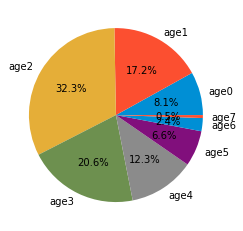

In [297]:
age_pi = [age0, age1, age2, age3, age4, age5, age6, age7]
age_pi_la = ['age0', 'age1', 'age2', 'age3', 'age4', 'age5', 'age6', 'age7']
plt.pie(age_pi, labels=age_pi_la, autopct='%.1f%%')
plt.show()

In [298]:
test = data.drop_duplicates(['HomePlanet'])
test

,index,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,NumId,Age_band
0,0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001,01,3
1,1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002,01,2
10,12,Mars,0,F/1/P,TRAPPIST-1e,32.0,0,73.0,0.0,1123.0,0.0,113.0,Berers Barne,1,0009,01,3


In [299]:
data["HomePlanet"].replace(["Earth","Mars","Europa"],[0,1,2],inplace=True)
data["HomePlanet"]

0       2
1       0
2       2
3       2
4       0
       ..
6601    2
6602    0
6603    0
6604    2
6605    2
Name: HomePlanet, Length: 6606, dtype: int64

In [300]:
data = data.drop(["index"], axis=1)
data = data.drop(["Name"], axis=1)
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupId,NumId,Age_band
0,2,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0001,01,3
1,0,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0002,01,2
2,2,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0003,01,5
3,2,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0003,02,3
4,0,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0004,01,1


In [301]:
data["Cabin"] = data["Cabin"].str[::-1]
data["Cabin"] = data["Cabin"].str[:1]
data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupId,NumId,Age_band
0,2,0,P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0001,01,3
1,0,0,S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0002,01,2
2,2,0,S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0003,01,5
3,2,0,S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0003,02,3
4,0,0,S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0004,01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,2,0,P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,9276,01,4
6602,0,1,S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0,9278,01,1
6603,0,0,S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,9279,01,2
6604,2,0,S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,9280,01,3


In [302]:
data["Cabin"].replace(["P","S"],[0,1],inplace=True)
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupId,NumId,Age_band
0,2,0,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0001,01,3
1,0,0,1,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0002,01,2
2,2,0,1,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0003,01,5
3,2,0,1,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0003,02,3
4,0,0,1,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0004,01,1


In [303]:
test = data.drop_duplicates(['Destination'])
test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupId,NumId,Age_band
0,2,0,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0001,01,3
5,0,0,0,PSO J318.5-22,44.0,0,0.0,483.0,0.0,291.0,0.0,1,0005,01,4
8,2,1,0,55 Cancri e,14.0,0,0.0,0.0,0.0,0.0,0.0,1,0008,01,1


In [304]:
data["Destination"].replace(["TRAPPIST-1e","PSO J318.5-22","55 Cancri e"],[0,1,2],inplace=True)
data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupId,NumId,Age_band
0,2,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0001,01,3
1,0,0,1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0002,01,2
2,2,0,1,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0003,01,5
3,2,0,1,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0003,02,3
4,0,0,1,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0004,01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,2,0,0,2,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,9276,01,4
6602,0,1,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,9278,01,1
6603,0,0,1,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,9279,01,2
6604,2,0,1,2,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,9280,01,3


In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6606 entries, 0 to 6605
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6606 non-null   int64  
 1   CryoSleep     6606 non-null   int64  
 2   Cabin         6606 non-null   int64  
 3   Destination   6606 non-null   int64  
 4   Age           6606 non-null   float64
 5   VIP           6606 non-null   int64  
 6   RoomService   6606 non-null   float64
 7   FoodCourt     6606 non-null   float64
 8   ShoppingMall  6606 non-null   float64
 9   Spa           6606 non-null   float64
 10  VRDeck        6606 non-null   float64
 11  Transported   6606 non-null   int64  
 12  GroupId       6606 non-null   object 
 13  NumId         6606 non-null   object 
 14  Age_band      6606 non-null   int64  
dtypes: float64(6), int64(7), object(2)
memory usage: 774.3+ KB


In [307]:
data = data.astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6606 entries, 0 to 6605
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HomePlanet    6606 non-null   int64
 1   CryoSleep     6606 non-null   int64
 2   Cabin         6606 non-null   int64
 3   Destination   6606 non-null   int64
 4   Age           6606 non-null   int64
 5   VIP           6606 non-null   int64
 6   RoomService   6606 non-null   int64
 7   FoodCourt     6606 non-null   int64
 8   ShoppingMall  6606 non-null   int64
 9   Spa           6606 non-null   int64
 10  VRDeck        6606 non-null   int64
 11  Transported   6606 non-null   int64
 12  GroupId       6606 non-null   int64
 13  NumId         6606 non-null   int64
 14  Age_band      6606 non-null   int64
dtypes: int64(15)
memory usage: 774.3 KB


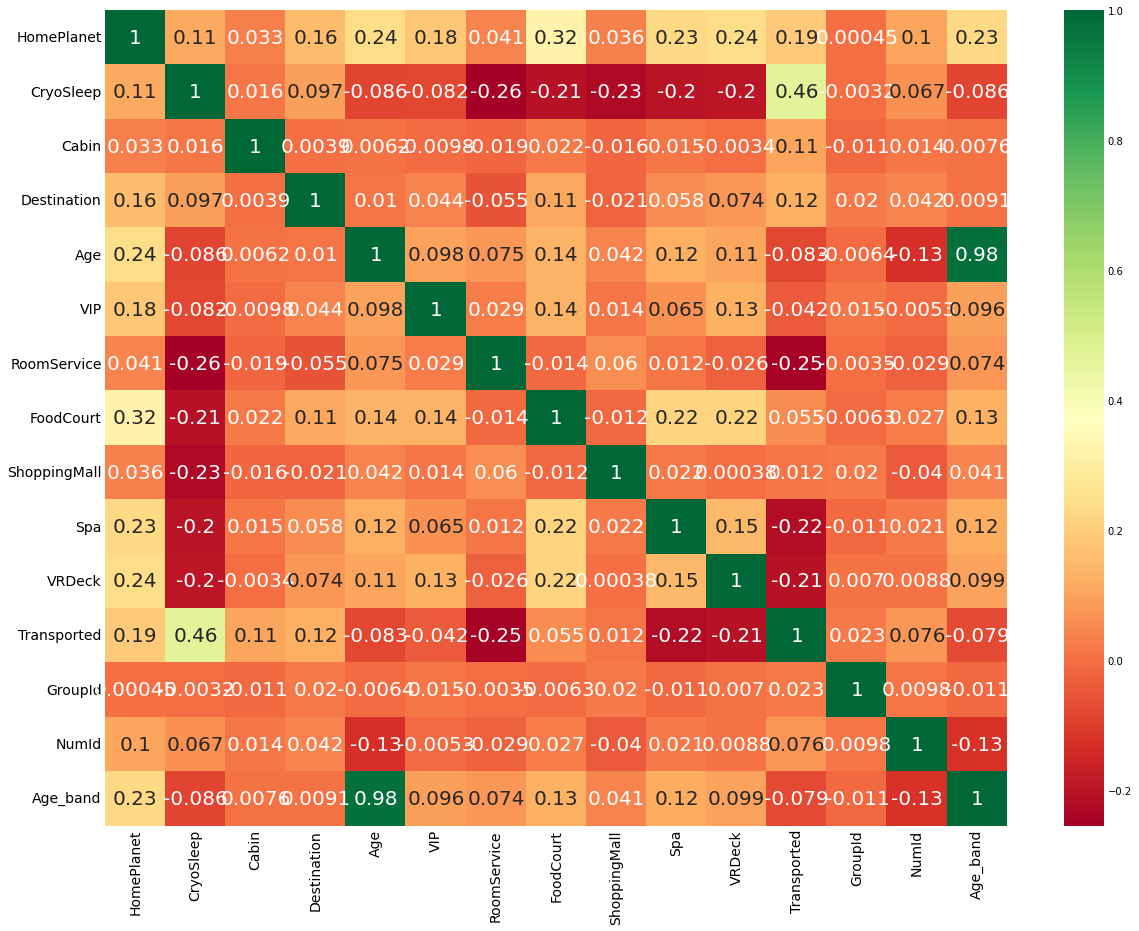

In [308]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()